<a href="https://colab.research.google.com/github/AlexanderSychev2005/stat_un/blob/main/ml_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv('data.csv')
dataset["Year"] = dataset["Date"] // 100
dataset.drop(columns=["Date"], inplace=True)

In [ ]:
dataset.head()

,Value,Year
0,80.3,1895
1,82.0,1896
2,83.4,1897
3,81.1,1898
4,81.6,1899


In [ ]:
dataset.tail()

,Value,Year
125,85.2,2020
126,80.9,2021
127,87.2,2022
128,86.3,2023
129,82.8,2024


In [ ]:
dataset.Value.describe()

,Value
count,130.000000
mean,82.451538
std,1.683860
min,78.000000
25%,81.400000
50%,82.400000
75%,83.400000
max,87.200000


In [ ]:
dataset_1895_2020 = dataset[(dataset['Year'] >= 1895) & (dataset['Year'] <= 2020)]
X = dataset_1895_2020['Year'].values
y = dataset_1895_2020['Value'].values


Text(0, 0.5, 'Avarege temperature F')

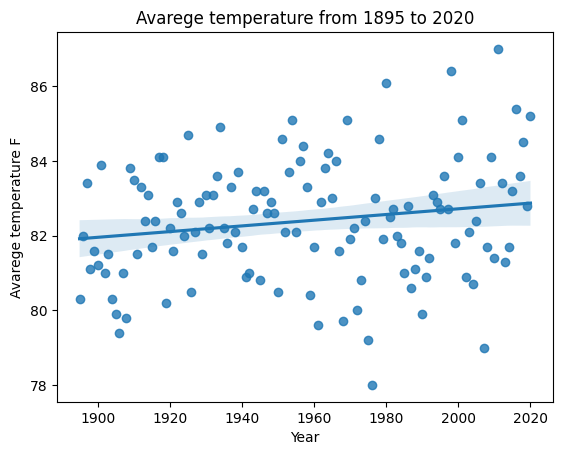

In [ ]:
axes = sns.regplot(x=X , y=y)
plt.title("Avarege temperature from 1895 to 2020")
plt.xlabel("Year")
plt.ylabel("Avarege temperature F")

## Linear Regression Sklearn Predicting values 2021-2024

In [ ]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X.reshape(-1, 1), y)

LinearRegression()

In [ ]:
test_x = np.array([2021, 2022, 2023, 2024])
y_pred = lin_regressor.predict(test_x.reshape(-1, 1))
y_pred_series = pd.Series(y_pred, test_x)
y_pred_series

,0
2021,82.877981
2022,82.885621
2023,82.893260
2024,82.900900


## Linear Reression scipy.stats Predicting values 2021-2024

In [ ]:
def myfunc(x):
  return slope * x + intercept

slope, intercept, r, p, std_err = stats.linregress(X, y)
"""
slope : Slope of the regression line.

intercept :  Intercept of the regression line.

rvalue : The Pearson correlation coefficient. The square of rvalue
is equal to the coefficient of determination.

pvalue :  The p-value for a hypothesis test whose null hypothesis is
that the slope is zero, using Wald Test with t-distribution of
the test statistic. See alternative above for alternative
hypotheses.

stderr : Standard error of the estimated slope (gradient), under the
assumption of residual normality.
"""



'\nslope : Slope of the regression line.\n\nintercept :  Intercept of the regression line.\n\nrvalue : The Pearson correlation coefficient. The square of rvalue\nis equal to the coefficient of determination.\n\npvalue :  The p-value for a hypothesis test whose null hypothesis is\nthat the slope is zero, using Wald Test with t-distribution of\nthe test statistic. See alternative above for alternative\nhypotheses.\n\nstderr : Standard error of the estimated slope (gradient), under the\nassumption of residual normality.\n'

In [ ]:
mymodel = list(map(myfunc, test_x))
pd.Series(mymodel, test_x)

,0
2021,82.877981
2022,82.885621
2023,82.893260
2024,82.900900


## Predicting values 1890-1895

In [ ]:
x_test2 = np.array([1890, 1891, 1892, 1893, 1894, 1895])
y_pred2 = lin_regressor.predict(x_test2.reshape(-1, 1))
pd.Series(y_pred2, x_test2)

,0
1890,81.877174
1891,81.884814
1892,81.892454
1893,81.900094
1894,81.907733
1895,81.915373


Text(0, 0.5, 'Avarege temperature F')

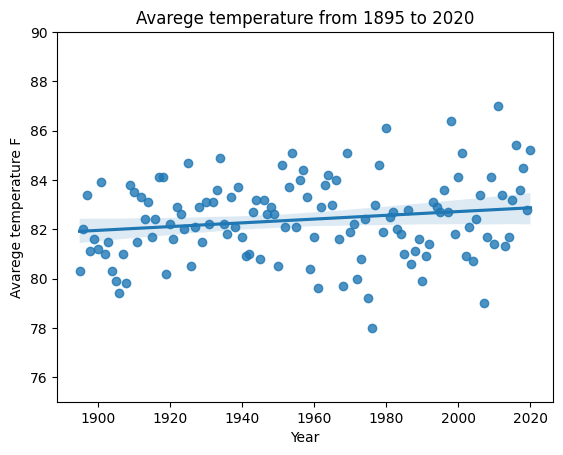

In [ ]:
axes = sns.regplot(x=X , y=y)
axes.set_ylim(75, 90)
plt.title("Avarege temperature from 1895 to 2020")
plt.xlabel("Year")
plt.ylabel("Avarege temperature F")

## Comparing predicted results to real values

In [ ]:
for i in (2021, 2022, 2023, 2024):
  value = dataset.loc[dataset['Year'] == i, 'Value']
  print(f"Real value for {i}: {value.iloc[0]}\nPredicted value: {y_pred_series[i]}")

Real value for 2021: 80.9
Predicted value: 82.87798095238095
Real value for 2022: 87.2
Predicted value: 82.88562069741282
Real value for 2023: 86.3
Predicted value: 82.8932604424447
Real value for 2024: 82.8
Predicted value: 82.90090018747657
